# 强化学习基础知识练习

本练习将帮助您理解和实践强化学习的基础概念。我们将从简单的马尔科夫链开始，逐步深入到MRP和MDP。

## 准备工作

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可重现
np.random.seed(42)

---
## 课程大纲

### 1. 马尔科夫链基础
- 马尔科夫性质
- 状态转移概率
- 状态转移矩阵

### 2. 马尔科夫奖励过程(MRP)
- 奖励函数
- 折扣因子
- 价值函数
- 贝尔曼方程
- 价值函数的计算方法（迭代法和蒙特卡洛方法）

### 3. 马尔科夫决策过程(MDP)
- 动作空间
- 策略（确定性和随机性）
- 状态价值函数(V函数)
- 动作价值函数(Q函数)
- 价值迭代与策略迭代
---

## 练习1：马尔科夫链

### 任务1.1：实现状态转移
创建一个简单的天气系统，包含三个状态：晴天(0)、多云(1)、雨天(2)

1. 创建状态转移矩阵
2. 实现一个函数，模拟状态转移过程
3. 记录并显示状态转移序列

In [28]:
# 定义状态转移矩阵
P = np.array([
    [0.7, 0.2, 0.1],  # 晴天的转移概率
    [0.3, 0.4, 0.3],  # 多云的转移概率
    [0.2, 0.3, 0.5]   # 雨天的转移概率
])

import random

# 我的版本
# def simulate_markov_chain(P, start_state, n_steps):
#     """模拟马尔科夫链状态转移
    
#     参数：
#         P: 状态转移矩阵
#         start_state: 初始状态
#         n_steps: 模拟步数
        
#     返回：
#         状态序列
#     """
#     # 在这里实现函数
#     states = [0, 1, 2]
#     state_array = [start_state]
#     for step in range(0, n_steps):
#         state_array.append(np.random.choice(states, p = P[state_array[step]]))
#     return state_array

# AI给的版本
def simulate_markov_chain(P, start_state, n_steps):
    """模拟马尔科夫链状态转移
    
    参数：
        P: 状态转移矩阵
        start_state: 初始状态
        n_steps: 模拟步数
        
    返回：
        状态序列
    """
    states = np.arange(len(P))  # 更通用的状态列表生成方式
    state_array = [start_state]
    
    # 状态名称映射
    state_names = ['晴天', '多云', '雨天']
    
    # print(f"初始状态: {state_names[start_state]}")
    for step in range(n_steps):
        next_state = np.random.choice(states, p=P[state_array[step]])
        state_array.append(next_state)
        # print(f"第{step+1}步: {state_names[state_array[step]]} -> {state_names[next_state]}")
    
    return state_array

# 测试代码
states = simulate_markov_chain(P, start_state=0, n_steps=10)
print("状态序列:", states)

状态序列: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


### 任务1.2：分析状态转移特性

在完成了状态转移的基本实现后，让我们深入分析马尔科夫链的一些特性：

1. 计算长期状态分布（稳态分布）
2. 分析状态转移的统计特性
3. 可视化状态转移过程


理论稳态分布概率：
晴天: 0.462
多云: 0.290
雨天: 0.248
初始状态: 晴天
第1步: 晴天 -> 多云
第2步: 多云 -> 多云
第3步: 多云 -> 雨天
第4步: 雨天 -> 晴天
第5步: 晴天 -> 晴天
第6步: 晴天 -> 多云
第7步: 多云 -> 雨天
第8步: 雨天 -> 多云
第9步: 多云 -> 晴天
第10步: 晴天 -> 多云
第11步: 多云 -> 晴天
第12步: 晴天 -> 多云
第13步: 多云 -> 晴天
第14步: 晴天 -> 雨天
第15步: 雨天 -> 多云
第16步: 多云 -> 晴天
第17步: 晴天 -> 晴天
第18步: 晴天 -> 晴天
第19步: 晴天 -> 多云
第20步: 多云 -> 雨天
第21步: 雨天 -> 雨天
第22步: 雨天 -> 多云
第23步: 多云 -> 雨天
第24步: 雨天 -> 多云
第25步: 多云 -> 晴天
第26步: 晴天 -> 晴天
第27步: 晴天 -> 晴天
第28步: 晴天 -> 晴天
第29步: 晴天 -> 多云
第30步: 多云 -> 雨天
第31步: 雨天 -> 雨天
第32步: 雨天 -> 晴天
第33步: 晴天 -> 晴天
第34步: 晴天 -> 晴天
第35步: 晴天 -> 晴天
第36步: 晴天 -> 多云
第37步: 多云 -> 晴天
第38步: 晴天 -> 晴天
第39步: 晴天 -> 多云
第40步: 多云 -> 多云
第41步: 多云 -> 多云
第42步: 多云 -> 雨天
第43步: 雨天 -> 多云
第44步: 多云 -> 晴天
第45步: 晴天 -> 多云
第46步: 多云 -> 多云
第47步: 多云 -> 多云
第48步: 多云 -> 晴天
第49步: 晴天 -> 雨天
第50步: 雨天 -> 多云
第51步: 多云 -> 晴天
第52步: 晴天 -> 晴天
第53步: 晴天 -> 多云
第54步: 多云 -> 雨天
第55步: 雨天 -> 多云
第56步: 多云 -> 多云
第57步: 多云 -> 多云
第58步: 多云 -> 多云
第59步: 多云 -> 雨天
第60步: 雨天 -> 雨天
第61步: 雨天 -> 雨天
第62步: 雨天 -> 雨天
第63步: 雨天 -> 多云
第64步: 多云 -> 雨天

e:\Personal_porject\20250207_RL\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26228 (\N{CJK UNIFIED IDEOGRAPH-6674}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Personal_porject\20250207_RL\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Personal_porject\20250207_RL\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Personal_porject\20250207_RL\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Personal_porject\20250207_RL\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38632 (\N{CJK UNIFIED IDEOGRAPH-96E8}) miss

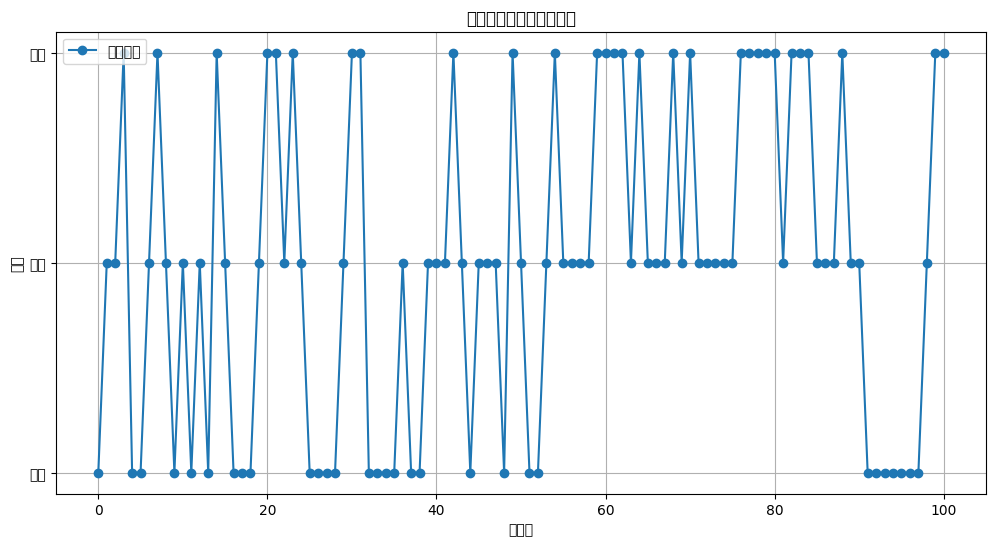

In [9]:
def calculate_steady_state(P, n_steps=1000, n_simulations=1000):
    """计算马尔科夫链的稳态分布
    
    参数：
        P: 状态转移矩阵
        n_steps: 每次模拟的步数
        n_simulations: 模拟次数
    
    返回：
        各状态的稳态分布概率
    """
    final_states = []
    for _ in range(n_simulations):
        # 为了减少打印输出，我们创建一个简化版的simulate_markov_chain
        states = [0]  # 从晴天开始
        for _ in range(n_steps):
            states.append(np.random.choice(np.arange(len(P)), p=P[states[-1]]))
        final_states.append(states[-1])
    
    # 计算每个状态的频率
    state_counts = np.bincount(final_states, minlength=len(P))
    steady_state = state_counts / n_simulations
    return steady_state

def plot_state_transitions(states, state_names=['晴天', '多云', '雨天']):
    """可视化状态转移序列
    
    参数：
        states: 状态序列
        state_names: 状态名称列表
    """
    plt.figure(figsize=(12, 6))
    plt.plot(states, '-o', label='状态转移')
    plt.yticks(range(len(state_names)), state_names)
    plt.xlabel('时间步')
    plt.ylabel('状态')
    plt.title('马尔科夫链状态转移过程')
    plt.grid(True)
    plt.legend()
    plt.show()

def analyze_transition_statistics(states, state_names=['晴天', '多云', '雨天']):
    """分析状态转移的统计特性
    
    参数：
        states: 状态序列
        state_names: 状态名称列表
    """
    # 计算每个状态的出现次数
    state_counts = np.bincount(states, minlength=len(state_names))
    state_probs = state_counts / len(states)
    
    print("\n状态出现概率：")
    for i, name in enumerate(state_names):
        print(f"{name}: {state_probs[i]:.3f}")
    
    # 计算实际的状态转移次数
    transitions = np.zeros((len(state_names), len(state_names)))
    for i in range(len(states)-1):
        transitions[states[i], states[i+1]] += 1
    
    # 计算实际的转移概率
    print("\n实际观察到的转移概率：")
    for i, from_state in enumerate(state_names):
        if state_counts[i] > 0:  # 避免除以0
            transitions[i] = transitions[i] / state_counts[i]
        print(f"从{from_state}转移的概率：")
        for j, to_state in enumerate(state_names):
            print(f"  到{to_state}: {transitions[i,j]:.3f}")

# 计算稳态分布
steady_state = calculate_steady_state(P)
print("\n理论稳态分布概率：")
for i, prob in enumerate(['晴天', '多云', '雨天']):
    print(f"{prob}: {steady_state[i]:.3f}")

# 生成并分析一个较长的状态序列
long_sequence = simulate_markov_chain(P, start_state=0, n_steps=100)
print("\n生成了100步的状态序列用于分析")

# 分析转移统计特性
analyze_transition_statistics(long_sequence)

# 可视化状态转移
plot_state_transitions(long_sequence)

## 练习2：马尔科夫奖励过程(MRP)

### 任务2.1：实现奖励函数和价值计算
在天气系统的基础上，我们添加奖励设定：
- 晴天：获得奖励 +5 (适合户外活动)
- 多云：获得奖励 +3 (部分户外活动可行)
- 雨天：获得奖励 +1 (户外活动受限)

#### 您需要完成以下任务：
1. 实现奖励函数
2. 使用迭代法计算价值函数
3. 使用蒙特卡洛方法计算价值函数
4. 比较两种方法的结果
   

In [37]:
# 定义奖励函数
rewards = np.array([5, 3, 1])  # 分别对应晴天、多云、雨天的奖励
gamma = 0.9  # 折扣因子

def get_reward(state):
    """获取某个状态的即时奖励"""
    return rewards[state]

# 请实现价值迭代函数
def value_iteration(P, rewards, gamma, theta=0.0001):
    """使用迭代法计算价值函数
    
    参数：
        P: 状态转移矩阵
        rewards: 奖励数组
        gamma: 折扣因子
        theta: 收敛阈值
    
    返回：
        价值函数V(s)
    """
    # 在这里实现价值迭代算法
    # 提示：
    # 1. 初始化价值函数V(s)为0
    # 2. 重复迭代直到收敛:
    #    V(s) = R(s) + gamma * sum(P(s'|s) * V(s'))
    V = np.zeros(len(P))

    states = [0, 1, 2]
    while True:
        V_old = V.copy()

        for state in range(len(P)):
            V[state] = rewards[state] + gamma * np.sum(P[state] * V_old)

        if np.max(np.abs(V-V_old)) < theta:
            break
    return V

# 请实现蒙特卡洛方法
def monte_carlo_evaluation(P, rewards, gamma, n_episodes=1000, max_steps=100):
    """使用蒙特卡洛方法计算价值函数
    
    参数：
        P: 状态转移矩阵
        rewards: 奖励数组
        gamma: 折扣因子
        n_episodes: 模拟回合数
        max_steps: 每个回合的最大步数
    
    返回：
        价值函数V(s)
    """
    # 在这里实现蒙特卡洛方法
    # 提示：
    # 1. 对每个起始状态，模拟多个回合
    # 2. 在每个回合中：
    #    - 记录访问的状态序列和获得的奖励
    #    - 计算折扣回报G_t
    # 3. 计算每个状态的平均回报
    states = [0, 1, 2]

    V = [0, 0, 0]

    n_episodes = 1000
    
    for i in range(0, n_episodes):
        for state in states:
            chain = simulate_markov_chain(P, state, 100)

            v = 0
            for j in range(len(chain)):
                v += rewards[chain[j]] * (gamma ** j)
            
            V[state] += v

    for i in range(len(V)):
        V[i] = V[i]/n_episodes

    return V

# 测试代码
def compare_methods():
    # 使用价值迭代计算
    V_iter = value_iteration(P, rewards, gamma)
    print("\n价值迭代结果：")
    for i, state in enumerate(['晴天', '多云', '雨天']):
        print(f"{state}的价值: {V_iter[i]:.3f}")
    
    # 使用蒙特卡洛方法计算
    V_mc = monte_carlo_evaluation(P, rewards, gamma)
    print(V_mc)
    print("\n蒙特卡洛方法结果：")
    for i, state in enumerate(['晴天', '多云', '雨天']):
        print(f"{state}的价值: {V_mc[i]:.3f}")
    
    # 比较两种方法的差异
    print("\n两种方法的差异：")
    for i, state in enumerate(['晴天', '多云', '雨天']):
        diff = abs(V_iter[i] - V_mc[i])
        print(f"{state}的差异: {diff:.3f}")

compare_methods()  # 等您实现完两个函数后再运行


价值迭代结果：
晴天的价值: 36.798
多云的价值: 32.866
雨天的价值: 29.995
[26.80144576736, 23.568423978900004, 17.865200347660004]

蒙特卡洛方法结果：
晴天的价值: 26.801
多云的价值: 23.568
雨天的价值: 17.865

两种方法的差异：
晴天的差异: 9.997
多云的差异: 9.297
雨天的差异: 12.130
